## 常用分布

### np.random.normal(0,1,1000) / np.random.normal(mu, sigma, 1000)
### np.random.randint(1, 7) # 1-6 as dice roll
### np.random.choice(values, p=probs) / np.random.choice([1, 2, 3, 4, 5, 6])
### np.random.binomial(1,p) 
### np.random.uniform(0,1,10)

### Reference:
* https://medium.com/@wenjun.sarah.sun/bootstrap-confidence-interval-in-python-3fe8d5a6fd56
* https://acclab.github.io/bootstrap-confidence-intervals.html
* https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d

https://github.com/SUN-Wenjun/bootstrapping

In [1]:
import math
import numpy as np

In [2]:
def bootstrap_ci(df, variable, classes, repetitions = 1000, alpha = 0.05, random_state=None):
    # df: a data frame that includes observations of the two sample
    # variable: the column name of the column that includes observations
    # classes: the column name of the column that includes group assignment (This column should contain two different group names)
    # repetitions: number of times you want the bootstrapping to repeat. Default is 1000.
    # alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05. 
    # random_stata: enable users to set their own random_state, default is None. 
    
    df = df[[variable, classes]]
    bootstrap_sample_size = len(df) 
    
    mean_diffs = []

    for i in range(repetitions):
        bootstrap_sample = df.sample(n = bootstrap_sample_size, replace = True, random_state = random_state)
        mean_diff = bootstrap_sample.groupby(classes).mean().iloc[1,0] - bootstrap_sample.groupby(classes).mean().iloc[0,0]
        mean_diffs.append(mean_diff)

    # confidence interval
    left = np.percentile(mean_diffs, alpha/2*100)
    right = np.percentile(mean_diffs, 100-alpha/2*100)

    # point estimate
    point_est = df.groupby(classes).mean().iloc[1,0] - df.groupby(classes).mean().iloc[0,0]

    print('Point estimate of difference between means:', round(point_est,2))
    print((1-alpha)*100,'%','confidence interval for the difference between means:', (round(left,2), round(right,2)))

### 下面这个好
* http://www.jtrive.com/the-empirical-bootstrap-for-confidence-intervals-in-python.html

In [3]:
def bootstrap(data, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = []
    sample_size = len(data) # 需要保持每次 bootstrap的 sample 长度和原来一样
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
        
    simulations.sort()
    
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    
    return(ci)

In [4]:
v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]

In [5]:
boot = bootstrap(v, n=5000)

In [6]:
cintervals = [boot(i) for i in (.90, .95, .99, .995)]

In [7]:
print(cintervals)

[(13.39, 17.259999999999998), (13.05, 17.6), (12.35, 18.150000000000002), (12.02, 18.330000000000005)]


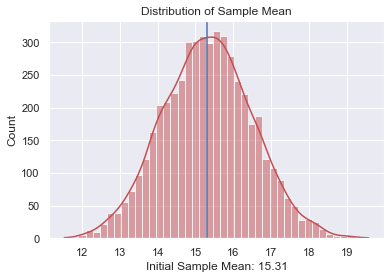

In [8]:
"""
Generate a histogram of the distribution of sample means for 
5000 bootstrap resamplings.
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]
xbar_init = np.round(np.mean(v), 2)

# generate 5000 resampled sample means  =>
means = [np.mean(np.random.choice(v,size=len(v),replace=True)) for i in range(5000)]
# sns.distplot(means, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
sns.histplot(means, kde=True, color="r")
plt.xlabel("Initial Sample Mean: {}".format(xbar_init))
plt.title("Distribution of Sample Mean")
plt.axvline(x=xbar_init) # vertical line at xbar_init
plt.show()

## Udacity AB testing
* https://nancyyanyu.github.io/posts/17c5bb19/

### Calculating CI for a Mean

In [9]:
N= [87029, 113407, 84843, 104994, 99327, 92052, 60684]
N_mean=sum(N)/len(N)
N_std=math.sqrt(sum([(n-N_mean)**2 for n in N])/(len(N)-1))
SE=N_std/math.sqrt(len(N))

cf_min,cf_max=N_mean-SE*1.96,N_mean+SE*1.96

print(cf_min,cf_max)

79157.54332794028 104367.02810063114


### Uses of A/A tests in Calculating a Confidence Interval Empirically
* Compare result to what you expect (sanity check)
* Estimate variance empirically and use your assumption about the distribution to calculate confidence
* Directly estimate confidence interval without making any assumption of the data

In [10]:
# click-through-probability of 40 A/A tests or bootstrap samples

group1=[0.02, 0.11, 0.14, 0.05, 0.09, 0.11, 0.09, 0.1 , 0.14, 0.08, 0.09,
       0.08, 0.09, 0.08, 0.12, 0.09, 0.16, 0.11, 0.12, 0.11, 0.06, 0.11,
       0.13, 0.1 , 0.08, 0.14, 0.1 , 0.08, 0.12, 0.09, 0.14, 0.1 , 0.08,
       0.08, 0.07, 0.13, 0.11, 0.08, 0.1 , 0.11]
group2=[0.07, 0.11, 0.05, 0.07, 0.1 , 0.07, 0.1 , 0.1 , 0.12, 0.14, 0.04,
       0.07, 0.07, 0.06, 0.15, 0.09, 0.12, 0.1 , 0.08, 0.09, 0.08, 0.08,
       0.14, 0.09, 0.1 , 0.08, 0.08, 0.09, 0.08, 0.11, 0.11, 0.1 , 0.14,
       0.1 , 0.08, 0.05, 0.19, 0.11, 0.08, 0.13]
confidence_level=0.95

In [11]:
# Method 1. assume metric is normally distributed
difference=[i-j for i,j in zip(group1,group2)]
mean = sum(difference)/len(difference)
SD=math.sqrt(sum([(i-mean)**2 for i in difference ])/(len(difference)-1))
# m=SD*z-score
m=SD*1.96
ci_max=mean+m
ci_min=mean-m

print(ci_min,ci_max)

-0.06702773846019527 0.07552773846019528


In [12]:
# Method 2. no assumption of metric distribution
difference=sorted(difference)
ci_min,ci_max=difference[1],difference[-2]

print(ci_min,ci_max)

-0.06000000000000001 0.08
